In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
import eli5
from eli5.sklearn import PermutationImportance

In [94]:
df = pd.read_csv('../input/student-mental-health/Student Mental health.csv')
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [95]:
# df['Do you have Depression?'].unique()
# df["What is your course?"].unique()
# df['Your current year of Study'].unique()
# df['Marital status'].unique()
# df['Do you have Anxiety?'].unique()
# df['Do you have Panic attack?'].unique()
df['Did you seek any specialist for a treatment?'].unique()

array(['No', 'Yes'], dtype=object)

In [96]:
df = df.drop('Timestamp', axis=1)

In [97]:
y = df['What is your CGPA?']
X = df.drop('What is your CGPA?', axis=1)
# X = pd.get_dummies(X, drop_first=True)

replacements = []

for i in X.columns:
    vals = list(X[i].unique())
    vals_replace = list(np.arange(len(vals)))
    my_dict = dict(zip(vals, vals_replace))
    replacements.append(my_dict)
    X[i] = X[i].replace(my_dict)

In [98]:
replacements

[{'Female': 0, 'Male': 1},
 {18.0: 0, 21.0: 1, 19.0: 2, 22.0: 3, 23.0: 4, 20.0: 5, 24.0: 6, nan: 7},
 {'Engineering': 0,
  'Islamic education': 1,
  'BIT': 2,
  'Laws': 3,
  'Mathemathics': 4,
  'Pendidikan islam': 5,
  'BCS': 6,
  'Human Resources': 7,
  'Irkhs': 8,
  'Psychology': 9,
  'KENMS': 10,
  'Accounting ': 11,
  'ENM': 12,
  'Marine science': 13,
  'KOE': 14,
  'Banking Studies': 15,
  'Business Administration': 16,
  'Law': 17,
  'KIRKHS': 18,
  'Usuluddin ': 19,
  'TAASL': 20,
  'Engine': 21,
  'ALA': 22,
  'Biomedical science': 23,
  'koe': 24,
  'Kirkhs': 25,
  'BENL': 26,
  'Benl': 27,
  'IT': 28,
  'CTS': 29,
  'engin': 30,
  'Econs': 31,
  'MHSC': 32,
  'Malcom': 33,
  'Kop': 34,
  'Human Sciences ': 35,
  'Biotechnology': 36,
  'Communication ': 37,
  'Diploma Nursing': 38,
  'Pendidikan Islam ': 39,
  'Radiography': 40,
  'psychology': 41,
  'Fiqh fatwa ': 42,
  'DIPLOMA TESL': 43,
  'Koe': 44,
  'Fiqh': 45,
  'Islamic Education': 46,
  'Nursing ': 47,
  'Pendidikan

In [99]:
label_encodings = {}
indices = range(0, len(y.unique()))
index = 0
for i in y.unique(): 
    label_encodings[i] = indices[index]
    index = index + 1
    
label_encodings

{'3.00 - 3.49': 0,
 '3.50 - 4.00': 1,
 '3.50 - 4.00 ': 2,
 '2.50 - 2.99': 3,
 '2.00 - 2.49': 4,
 '0 - 1.99': 5}

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = y.replace(label_encodings)

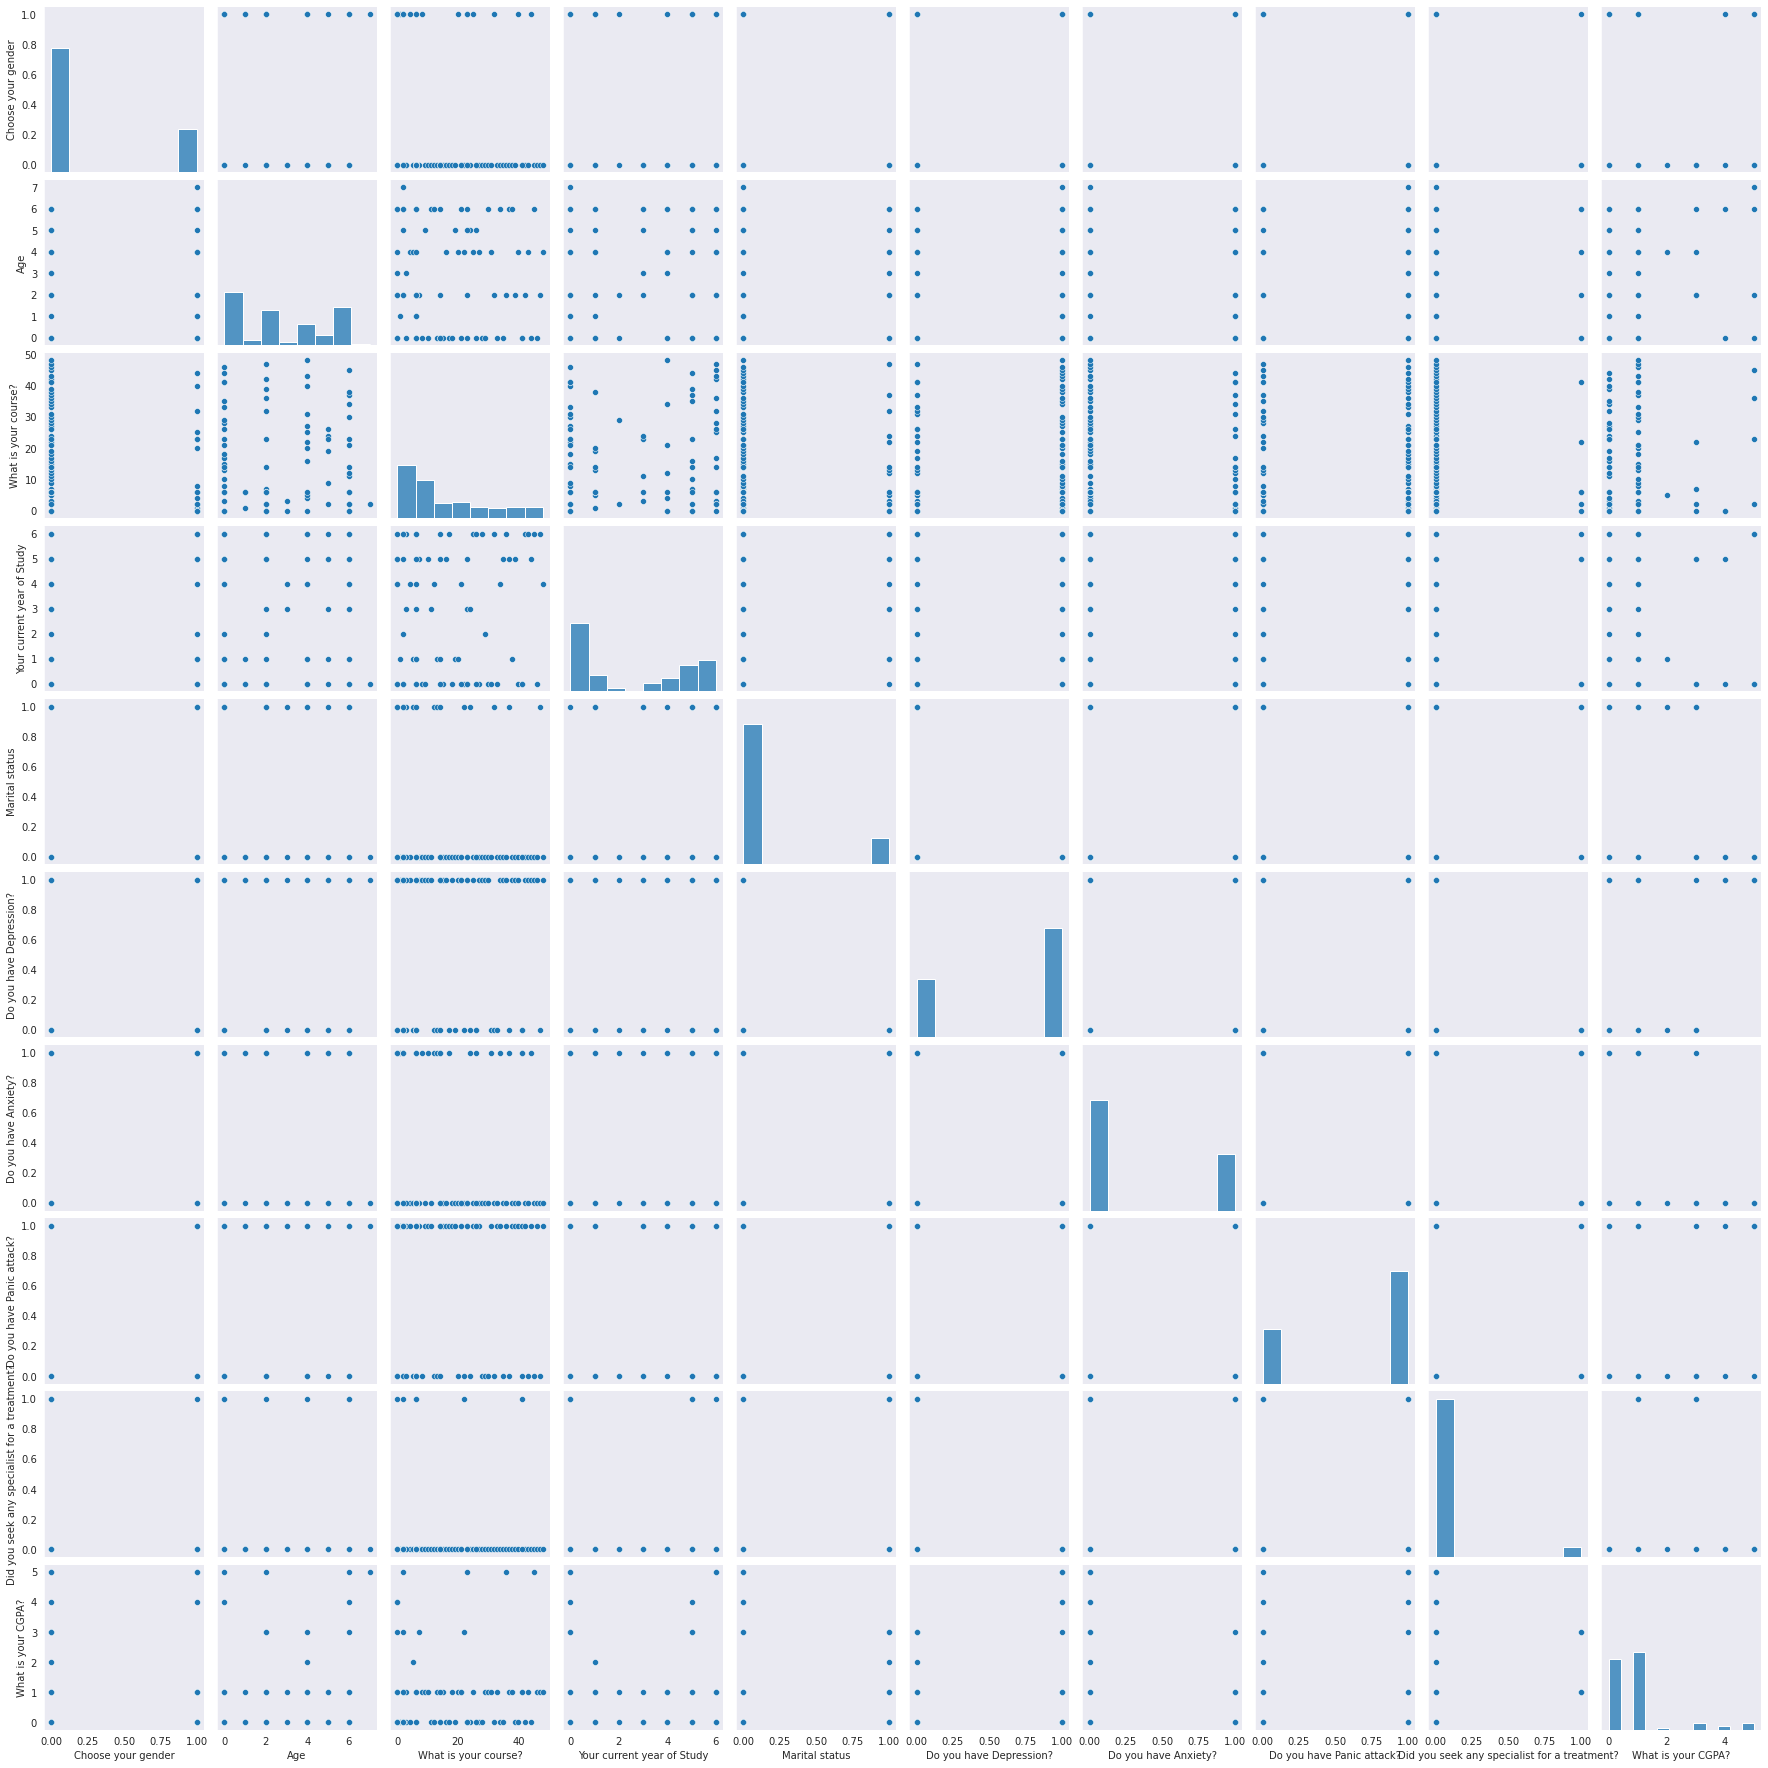

In [101]:
sns.pairplot(pd.concat([X, y], axis=1))

<AxesSubplot:xlabel='What is your CGPA?', ylabel='Density'>

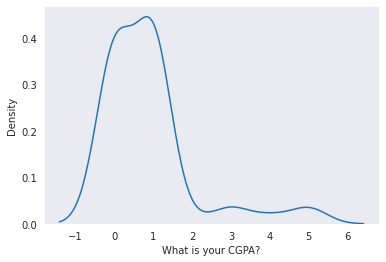

In [102]:
sns.kdeplot(y)
#this is the probability distribution of our Y values

<AxesSubplot:xlabel='What is your CGPA?', ylabel='Count'>

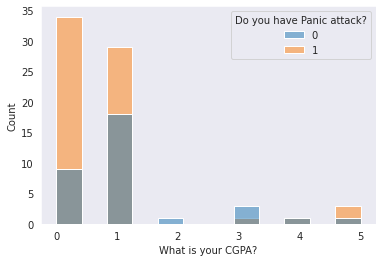

In [103]:
sns.histplot(data = pd.concat([X, y], axis=1), x = 'What is your CGPA?', hue='Do you have Panic attack?')

<AxesSubplot:xlabel='What is your CGPA?', ylabel='Count'>

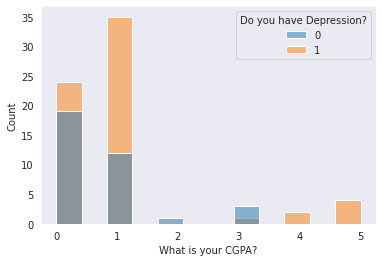

In [104]:
sns.histplot(data = pd.concat([X, y], axis=1), x = 'What is your CGPA?', hue='Do you have Depression?')

<AxesSubplot:xlabel='What is your CGPA?', ylabel='Count'>

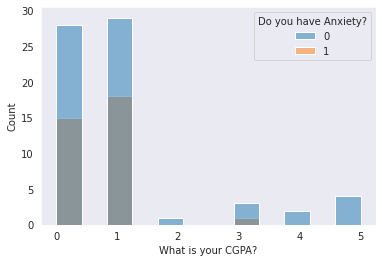

In [105]:
sns.histplot(data = pd.concat([X, y], axis=1), x = 'What is your CGPA?', hue='Do you have Anxiety?')

#As you can see , GPA doesn't depend much on anxiety.
#This you could also see in the Permutation Importance Chart below

<AxesSubplot:>

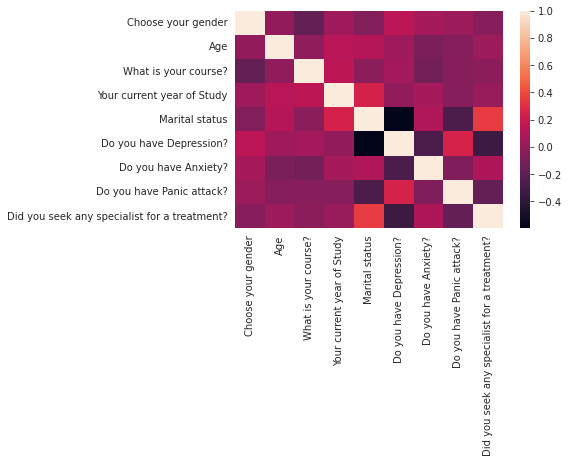

In [106]:
sns.heatmap(X.corr())
#This is an almost diagonal matrix as non - diagonal values are very small,
#Hence, it can be optimal to use naive bayes classifier as most of the features will be independent to one another

In [107]:
X.columns

Index(['Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [108]:
# !pip install pgmpy

In [109]:
import pgmpy
import networkx as nx

In [110]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Choose your gender                            101 non-null    int64  
 1   Age                                           101 non-null    float64
 2   What is your course?                          101 non-null    int64  
 3   Your current year of Study                    101 non-null    int64  
 4   Marital status                                101 non-null    int64  
 5   Do you have Depression?                       101 non-null    int64  
 6   Do you have Anxiety?                          101 non-null    int64  
 7   Do you have Panic attack?                     101 non-null    int64  
 8   Did you seek any specialist for a treatment?  101 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 7.2 KB


In [111]:
combined  = pd.concat([X, y], axis=1)
combined = combined.dropna()
y = combined['What is your CGPA?']
X = combined.drop('What is your CGPA?', axis=1)

In [112]:
from pgmpy.models import BayesianNetwork
import pandas as pd
from IPython.display import Image, display
from pgmpy.estimators import HillClimbSearch, BicScore, PC, K2Score
from pgmpy.estimators import BayesianEstimator
import networkx as nx

  0%|          | 0/1000000 [00:00<?, ?it/s]

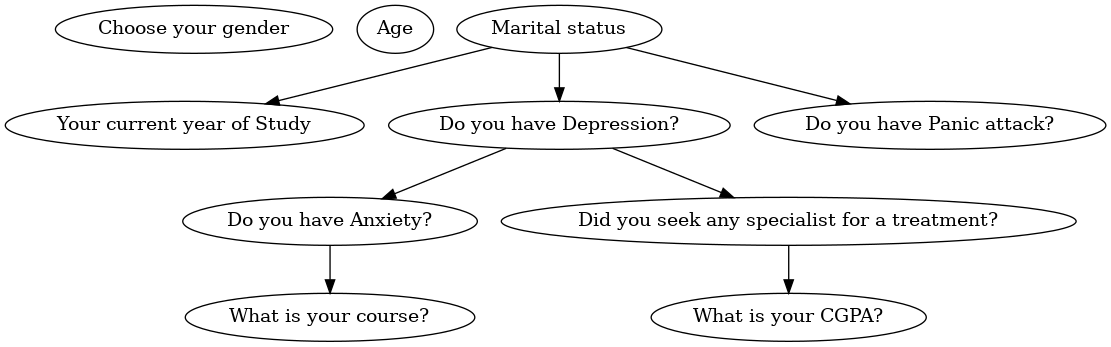

In [113]:
hc1 = HillClimbSearch(combined, HillClimbSearch(combined))
est_model1 = hc1.estimate()
display(Image((nx.drawing.nx_pydot.to_pydot(est_model1)).create_png()))

# Using this graph, We can infer that Gender and Age will not contribute to the Joint Probability Distribution of all the Variables. Hence, It will be Okay if we do - not use these variables in our Model. 

In [114]:
X = X.drop(['Choose your gender', 'Age'], axis=1)

In [115]:
model = naive_bayes.CategoricalNB()
model.fit(X, y)

CategoricalNB()

One of the most basic questions we might ask of a model is: What features have the biggest impact on predictions?
This concept is called **feature importance**.

The values towards the top are the most important features, and those towards the bottom matter least.
The first number in each row shows how much model performance decreased with a random shuffling (in this case, using "accuracy" as the performance metric).

In [116]:
perm = PermutationImportance(model, random_state=1).fit(X, y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.2218 ± 0.0269,What is your course?
0.0376 ± 0.0148,Did you seek any specialist for a treatment?
0.0297 ± 0.0651,Do you have Panic attack?
0.0218 ± 0.0231,Do you have Depression?
-0.0099 ± 0.0651,Your current year of Study
-0.0158 ± 0.0097,Marital status
-0.0178 ± 0.0079,Do you have Anxiety?


In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score
pred1 = []
index = 0
for i in range(X.shape[0]):
    pred1.append(model.predict(X[index: index+1]))
    index = index + 1

In [118]:
accuracy_score(y, pred1)

0.7623762376237624

**This model predicts the dataset with 77% accuracy . Below is the glimpse of the network Architecture **

> 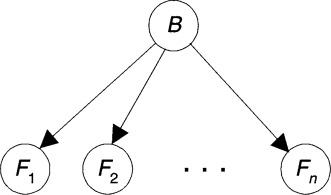

In [119]:
pred1 = [i[0] for i in pred1]

In [120]:
index = 0
for i in pred1:
    if i == 0 :
        pred1[index] = '3.00 - 3.49'
    if i == 1 :
        pred1[index] = '3.50 - 4.00'
    if i == 2:
        pred1[index] = '3.50 - 4.00'
    if i == 3:
        pred1[index] = '2.50 - 2.99'
    if i == 4:
        pred1[index] = '2.00 - 2.49'
    if i == 5:
        pred1[index] = '0 - 1.99'
    index = index + 1

<AxesSubplot:>

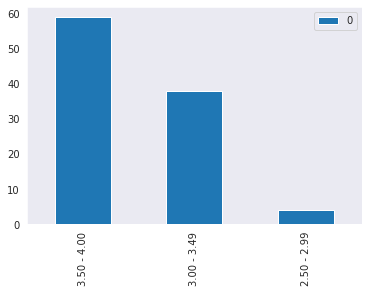

In [121]:
from collections import Counter
import pandas


data = pred1
count = Counter(data)
df = pandas.DataFrame.from_dict(count, orient='index')
df.plot(kind='bar')

In [122]:
#saving pickled model
import pickle
filename = 'my_finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Comparision to Baseline Model - ( Support Vector Classifier )

In [123]:
#initialize and fit the SVC Model

from sklearn.svm import SVC
model_baseline = SVC()
model_baseline.fit(X, y)

SVC()

In [124]:
#Make Predictions

from sklearn.metrics import confusion_matrix, accuracy_score
pred1 = []
index = 0
for i in range(X.shape[0]):
    pred1.append(model_baseline.predict(X[index: index+1]))
    index = index + 1

In [125]:
#Calculate accuracy score

accuracy_score(y, pred1)

0.49504950495049505

# Clearly, Our PGM Based Model Achieves better Accuracy than SVC